In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [2]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

with open("results_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
results_GE = get_results_for_p(p,all_results)

with open("model_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
model = get_results_for_p(p,all_results)

No results found for p = (3, 100, 5, 4, 6, 0.5, 1.0, 10.0, 0.85, 1.0, 1.0)
(3, 100, 5, 4, 6, 0.5, 1.0, 10.0, 0.85, 1.0, 1.0)
(3, 100, 5, 4, 6, 0.5, 1.0, 10.0, 0.85, 1.0, 1.0)


In [3]:
#Simulation
from simulate import Simulator
sim = Simulator(model,p)
simulation = sim.simulate_val

In [10]:
#Simulating a bunch of firms
irf_simul_young_small = sim.simulate_firm(p.z_0-1,1,0,50,p.q_0,5, allow_hiring=False,allow_leave=False,update_z=False, pb=False)
irf_simul_young_big =   sim.simulate_firm(p.z_0-1,3,0,50,p.q_0,5, allow_hiring=False,allow_leave=False,update_z=False, pb=False)
irf_simul_old_small =   sim.simulate_firm(p.z_0-1,0,1,50,p.q_0,5, allow_hiring=False,allow_leave=False,update_z=False, pb=False)
irf_simul_old_big =     sim.simulate_firm(p.z_0-1,0,3,50,p.q_0,5, allow_hiring=False,allow_leave=False,update_z=False, pb=False)
irf_simul_all_small =   sim.simulate_firm(p.z_0-1,1,1,50,p.q_0,5, allow_hiring=False,allow_leave=False,update_z=False, pb=False)
irf_simul_all_big =     sim.simulate_firm(p.z_0-1,2,2,50,p.q_0,5, allow_hiring=False,allow_leave=False,update_z=False, pb=False)

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\simulate.py:631: RuntimeWarning: divide by zero encountered in log
  W[I_sen] = np.log(w[t,1])


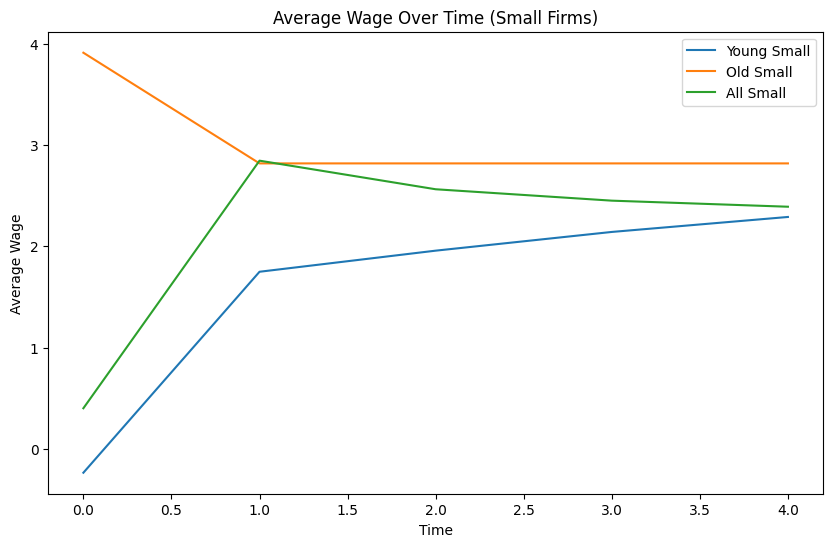

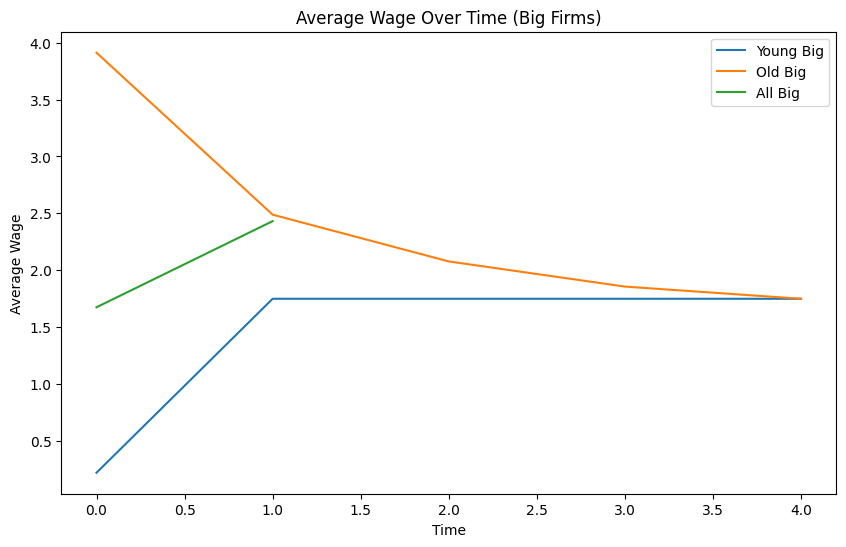

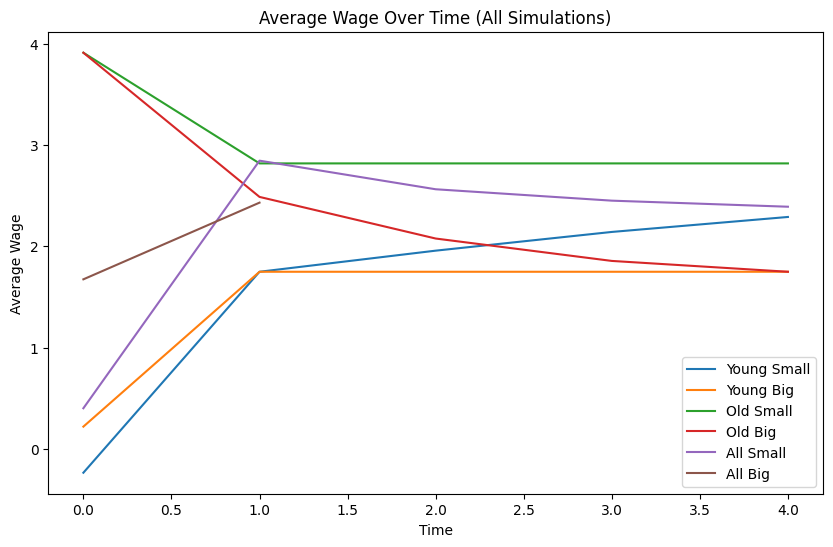

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Store your simulation DataFrames in a dictionary
simulations = {
    'Young Small': irf_simul_young_small,
    'Young Big': irf_simul_young_big,
    'Old Small': irf_simul_old_small,
    'Old Big': irf_simul_old_big,
    'All Small': irf_simul_all_small,
    'All Big': irf_simul_all_big
}

# Helper function to compute average wage over time (only for employed workers)
def get_avg_wage(sim_df):
    employed = sim_df[sim_df['f'] > 0]
    return employed.groupby('t')['w'].mean()

# Compute average wages for each simulation and store them in a new dictionary
avg_wages = {name: get_avg_wage(df) for name, df in simulations.items()}

# Define groups for small and big firms
small_names = ['Young Small', 'Old Small', 'All Small']
big_names = ['Young Big', 'Old Big', 'All Big']

# Plot for Small Firms
plt.figure(figsize=(10, 6))
for name in small_names:
    plt.plot(avg_wages[name].index, avg_wages[name], label=name)
plt.title('Average Wage Over Time (Small Firms)')
plt.xlabel('Time')
plt.ylabel('Average Wage')
plt.legend()
plt.show()

# Plot for Big Firms
plt.figure(figsize=(10, 6))
for name in big_names:
    plt.plot(avg_wages[name].index, avg_wages[name], label=name)
plt.title('Average Wage Over Time (Big Firms)')
plt.xlabel('Time')
plt.ylabel('Average Wage')
plt.legend()
plt.show()

# Alternatively, plot all simulations together
plt.figure(figsize=(10, 6))
for name, wage_series in avg_wages.items():
    plt.plot(wage_series.index, wage_series, label=name)
plt.title('Average Wage Over Time (All Simulations)')
plt.xlabel('Time')
plt.ylabel('Average Wage')
plt.legend()
plt.show()


<Axes: title={'center': 'Wage Over Time'}, xlabel='t'>

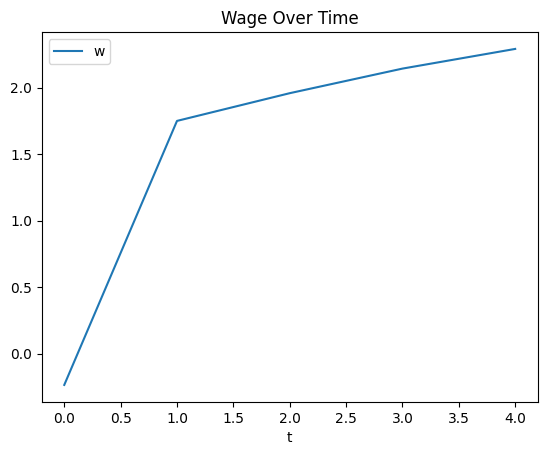

In [ ]:
employed_data = irf_simul.loc[irf_simul['f'] > 0]
employed_data.plot(x='t', y='w', kind='line', title='Wage Over Time')

In [10]:
irf_simul.loc[irf_simul['i'] == 0]

,i,t,f,z,w,Pi,D,S,n0,n1,pr_e2u,pr_j2j,y,W1,vs
0,0,0,1.0,1.0,-0.235689,79.047396,0,1.0,1.0,0.0,0.0,0.000000,0.008458,0.000000,0.000000
0,0,1,1.0,1.0,1.748942,32.826481,1,2.0,0.0,1.0,0.0,0.238275,0.000000,48.466953,50.107934
0,0,2,1.0,1.0,1.957288,29.854597,1,3.0,0.0,1.0,0.0,0.311467,0.000000,48.951584,49.914122
0,0,3,1.0,1.0,2.142112,26.831163,1,4.0,0.0,1.0,0.0,0.277389,0.000000,49.375225,50.016228
0,0,4,1.0,1.0,2.290033,24.176384,1,5.0,0.0,1.0,0.0,0.236572,0.000000,49.700118,50.111426


In [ ]:
np.where(model.sep_star>0) #it's 0 everywhere? is that why the model converged???

(array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [4]:
from time import time
profiler = cProfile.Profile()
profiler.enable()
simul_result=sim.simulate_val()
profiler.disable()
# Print profiling results
stats = pstats.Stats(profiler).sort_stats(pstats.SortKey.TIME)
#stats.print_stats()

In [5]:
from timeit import timeit
print("Simulation time:", timeit(sim.simulate_val, number=10))

Simulation time: 3.1729782999900635


Time to perform 10 simulations:
Simulation time 1st time: 140.17326560002402
Simulation removed allocate_workers_to_vac_rand: 132.93263450000086
Simulation, when add z,prod,n0,n1 to the data at the end: 126.88947200000985
Simulation after removing closed firms from F_set: 133.41353940000408????
Simulation after removing closed firms from F_set, again, extra minor tweaks: 126.22359539999161
Simulation after setting initial prod back to avg: 195.49598599999445 OOOOOH Shit. tbf, the laptop also lost connection to the charger at some point, so this may have been that
Simulation after removing empty firms + vectorizing the 2d interpolation: 8.297498100000666
Simulation after vectorizing n0 and n1 counts: 4.869289499998558
Simulation after vectorizing prod interp: 3.3665357000136282
Final simulation (some minor updates ig?): 3.1729782999900635 

HUGE IMPROVEMENT

In [ ]:
end-beg #14 seconds to simulate is quite a bit ehhhh

13.704903602600098

Bug List:
1. Firms end up with too many workers (5 when the max is 4). Happens if initial productivity is set to the highest level
2. Too many entering firms. Happens even when the number of open firms crosses the number of workers (guess we have a bunch of empty,non-hiring firms??? nope not possible outside of the lowest productivity)
3. The F_set update loop somehow works even when there's more open firms than the size of, say rho[t,:].
4. Not enough expected hirings when close_pr = 0.5??? BUT THE CLOSED FIRMS ARE HIRING ASSERTION IS FINE???

J shape (3, 5, 5, 100, 6)
W shape (3, 5, 5, 100, 6, 2)
kappa 39.9550011371911
P [ 0.48477739  0.48440119  0.48400024  0.48357285  0.48311719  0.48263129
  0.48211303  0.48156012  0.48097011  0.48034034  0.47966794  0.47894982
  0.47818261  0.47736268  0.47648609  0.47554856  0.47454542  0.47347161
  0.47232159  0.47108933  0.46976821  0.46835098  0.46682969  0.46519557
  0.46343898  0.46154924  0.45951452  0.45732169  0.45495613  0.45240149
  0.44963948  0.44664951  0.44340838  0.43988982  0.43606394  0.43189663
  0.42734879  0.42237532  0.41692397  0.41093384  0.40433351  0.39703866
  0.38894901  0.37994435  0.36987934  0.35857658  0.34581734  0.33132889
  0.31476706  0.29569191  0.27353354  0.24754413  0.21673264  0.17978601
  0.13502418  0.08068697  0.01800958  0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0

c:\Users\andre\Codes\Multi-worker firm\Multiworker_wage_2steps\primitives.py:186: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


EJinv 4.408003266261871
EJderiv 12.393514852785415
EJinv diff 1j 2s: 5.082950773462714
EJinv diff 1 sen: 1.73652214458595
EJinv diff 2 sen: 12.489710814944685


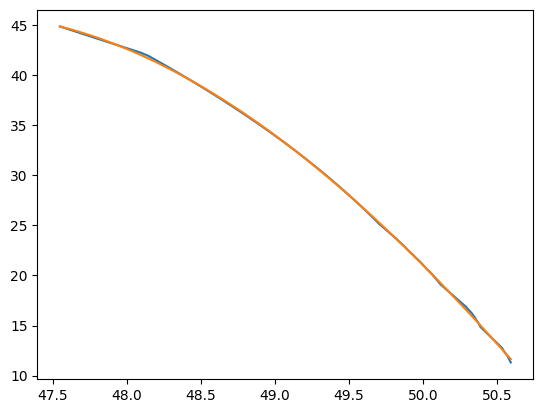

q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.005330617108140872
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.005764022402208284
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.006869487920678651
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.008073005539237281
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.010305020981496247
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.012653074414631024
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.014544516590610268
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.016070736632048346
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.017713492073640525
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 0.0
Diff Rh

In [3]:
from Multiworker_Contract_GE import MultiworkerContract
mwc_GE=MultiworkerContract(p)

# GE basic
if results_GE is not None:
    mwc_GE_J = results_GE['J']
    mwc_GE_W = results_GE['W']
    mwc_GE_U = results_GE['U']
    mwc_GE_Rho = results_GE['Rho']
    mwc_GE_P = results_GE['P']
    mwc_GE_kappa = results_GE['kappa']

#model=mwc_GE.J_sep(update_eq=1,s=10.0)
model=mwc_GE.J_sep(mwc_GE_J,mwc_GE_W,mwc_GE_U,mwc_GE_Rho,mwc_GE_P,mwc_GE_kappa,update_eq=1,s=10.0)

In [7]:
import numpy as np
def bool_index_combine(I,B):
    """ returns an index where elements of I have been updated using B
    I,B are boolean, and len(B)==I.sum() """
    I2 = np.copy(I)
    I2[I]=B
    return I2

F= np.array([1,1,1,0,1], dtype=bool)

close_pr = 0.5 #Percent of closing firms. For now, without aggregate movements, keep it constant
close = np.random.binomial(1, close_pr, F.sum())==1  
bool_index_combine(F,close)


array([False, False,  True, False,  True])

In [8]:
F= np.array([1,2,3,4,5])
close = np.random.binomial(1, close_pr, F.shape[0])==1  
F=F*close

for f in F:
    if f==0:
        continue
    print(f)

4


In [9]:
F_set = np.array([1,2,3,4,5])*close
F_set

array([0, 0, 0, 4, 0])

In [11]:
nf = len(F_set)
n_new=5

new_firms = np.arange(nf + 1, nf + n_new + 1)  # Names: nf+1, nf+2, ..., nf+n_new
F_set = np.concatenate((F_set, new_firms))

In [43]:
import numpy as np
n0 = np.zeros(len(F_set[F_set != -2])+1)
#Checking whether the summing up firms size works:
F = np.array([1, -1, 2, 3, 3, 4, 5, 1, 1])
S = np.array([2, 1, 2, 1, 1, 1, 2, 2, 2])
F_set = np.array([1,2,3,4,5,-2])
for f in F_set[F_set != -2]:
    n0[f] = len(F[(F==f) & (S==1)])

In [13]:
F= np.array([1,2,3,4,5])
close = np.random.binomial(1, close_pr, F.shape[0])==1  
F=F*close
z = np.array([1/1.5,1/2,1/3,1/4,1/5,1/6,1/7,1/8,1/9,1/10])
z[F]

# Create a generator instance
rng = np.random.default_rng()

result = rng.binomial(1, z[F])

In [19]:
#Checking whether np.repeat works, when some firms have zero hiring
F_set= np.array([1,-2,3,-2,5])
n_hire = np.array([1.5, 0, 3.3, 0, 2])

integer_parts = np.floor(n_hire).astype(int)
integer_firms = np.repeat(F_set, integer_parts)

57.8736267314858


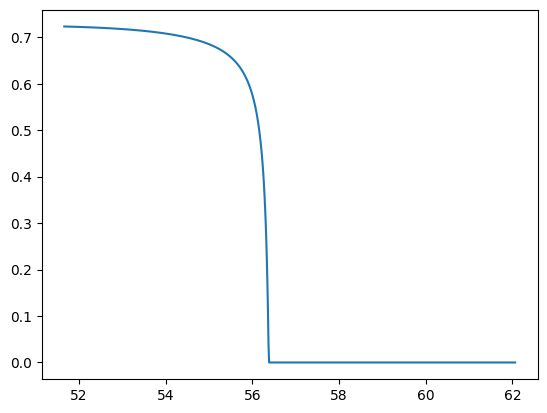

In [3]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

In [ ]:
from Multiworker_Contract_Spline import MultiworkerContract
mwc = MultiworkerContract(6, p, cc.js)
(mwc_J,mwc_W,mwc_U,mwc_Rho,mwc_Wstar,mwc_sep,mwc_n0,mwc_n1)=mwc.J_sep(s=10.0)

In [11]:
objects['mwc_J'] = mwc_J
objects['mwc_W'] = mwc_W
objects['mwc_U'] = mwc_U
objects['mwc_Rho'] = mwc_Rho

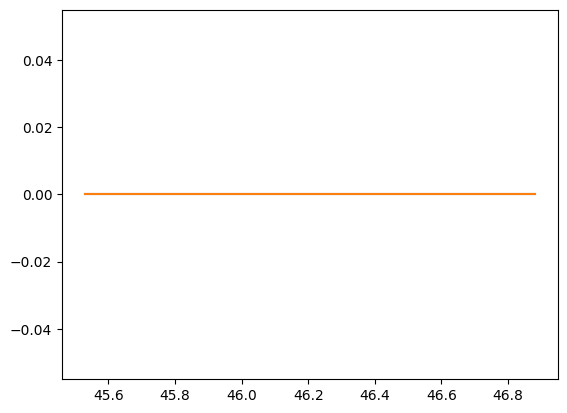

In [31]:
prod = p.z_0-3
j=3
s=3
minv= 0
q = 0

from scipy.interpolate import splrep
from scipy.interpolate import splev

#J_spline = splrep(mwc_GE_W[prod,j,s,:,q,1],mwc_GE_J[prod,j,s,:,q],s=10.0)
#J_spline_curve = splev(mwc_GE_W[prod,j,s,:,q,1], J_spline)

#plt.plot(mwc_GE_W[prod,j,s,:,q,1],mwc_GE_J[prod,j,s,:,q])
#plt.plot(mwc_GE_W[prod,j,s,:,q,1],J_spline_curve)

plt.plot(mwc_GE_W[prod,j,s,:,q,1],mwc_GE_n0[prod,j,s,:,q])
plt.plot(mwc_GE_W[prod,j,s,:,q,1],mwc_GE_sep[prod,j,s,:,q]) #Okay separations are trash. More separations at higher productivity. Found this at j1,s2,q0

#plt.plot(mwc_Rho_W[prod,j,s,:,q,1],mwc_Rho.J1p.eval_at_W1(mwc_Rho_W[...,1])[prod,j,s,:,q])
#plt.plot(mwc_Rho_W[prod,j,s,:,0,1],mwc_Rho_Rho[prod,j,s,:,0]) #Why is Rho convex??? Why J is concave? Also it's not smooth at highest productivity, effect of hiring i'd wager
#plt.plot(mwc_Rho_W[prod,j,s,:,0,1],mwc_Rho_n0[prod,j,s,:,0])
#plt.plot(mwc.w_grid,mwc_W[p.z_0-1,j,s,:,0,1])
#plt.plot(mwc_Rho.w_grid,mwc_Rho_J[p.z_0-1,j,s,:,0])

In [ ]:
mwc_Rho_J = results['J']
mwc_Rho_W = results['W']
mwc_Rho_U = results['U']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
mwc_Rho_Rho = results['Rho']


from Multiworker_Contract_Tasmanian_light import MultiworkerContract
mwc = MultiworkerContract(6, p, cc.js)
(mwc_J,mwc_W,mwc_U,mwc,mwc_Wstar,mwc_sep,mwc_n0,mwc_n1)=mwc.J_sep()

Tasmanian Hiring. SUPER SLOW. Like 5+ seconds per iteration

In [ ]:
            #How would I do it using Tasmanian
            n0_star_x = np.zeros_like(n0_star)
            foc_hire = np.zeros_like(Rhod0)
            start= time.time()
            if ite_num >= 10:
             for iz in range(self.p.num_z):
                for in0 in range(self.p.num_n):
                 for in1 in range(self.p.num_n):
                    for iv in range(self.p.num_v):
                        for iq in range(self.p.num_q):
                         for in00 in range(self.p.num_n):
                            foc_hire[iz,in0,in1,iv,iq,in00] = self.gridE[iz].differentiate(np.array([N_grid[in00], n1_star[iz, in0, in1, iv, iq], rho_star[iz, in0, in1, iv, iq], q_star[iz, in0, in1, iv, iq]]))[0]
                            if foc_hire[iz,in0,in1,iv,iq,in00] < self.p.hire_c/self.p.beta: 
                                if in00 == 0:
                                    break #Meaning that n0_star is 0
                                else: 
                                    n0_star_x[iz,in0,in1,iv,iq] = np.interp (self.p.hire_c/self.p.beta, foc_hire[iz,in0,in1,iv,iq,:in00],N_grid[:in00])
                                    break
            end= time.time()
            print("Time for the Tasmanin hiring", end-start)    
            print("Difference between hiring methods", np.mean(np.abs(n0_star_x-n0_star))) #Note that this is in differences rather than %


Rhod0 alternative. ALSO GETS FUCKING SLOW FUUUUUUUUUUUUUUUCK
Even at its fastest (<1sec) was still 10 times slower than lin interp

In [ ]:
            print("Time for Rhod0", end-start)   
            #Alternatively, we can do points evaluation. Maybe it's faster?
            Rhod0_x = np.zeros_like(Rhod0)
            start=time.time()
            # Repeat N_grid along the number of flattened points
            n0_repeated = np.repeat(N_grid[:, np.newaxis], n1_star[0, ...].size, axis=1)
            for iz in range(self.p.num_z):
                # Flatten n1_star, rho_star, q_star
                n1_flat = n1_star[iz, ...].ravel()
                rho_flat = rho_star[iz, ...].ravel()
                q_flat = q_star[iz, ...].ravel()

                # Prepare points to evaluate (shape: (num_points * num_n, 4))
                points_to_evaluate = np.vstack([
                n0_repeated.ravel(),  # Flatten n0_repeated to match the other arrays
                np.tile(n1_flat, self.p.num_n),  # Repeat n1_flat for each n0 value
                np.tile(rho_flat, self.p.num_n),  # Same for rho_flat
                np.tile(q_flat, self.p.num_n)    # Same for q_flat
                ]).T

                # Evaluate the batch
                results = self.gridE[iz].evaluateBatch(points_to_evaluate)[..., 0].reshape(n0_star[iz, ...].shape + (self.p.num_n,))

                # Store results
                Rhod0_x[iz, ...] = results
            end=time.time()
            print("Time for Tasmanian Rhod0", end-start)
            print("Difference between Rhod0 methods", np.mean(np.abs((Rhod0-Rhod0_x)/Rhod0)))
            Rhod0 = Rhod0_x

In [4]:
mwc_Rho_J = objects['mwc_Rho_J']
mwc_Rho_W = objects['mwc_Rho_W']

In [ ]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_sep,mwc_Rho_n0,mwc_Rho_n1)=mwc_Rho.J_sep(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U)

In [7]:
objects['mwc_Rho_J'] = mwc_Rho_J
objects['mwc_Rho_W'] = mwc_Rho_W
objects['mwc_Rho_U'] = mwc_Rho_U
objects['mwc_Rho_Rho'] = mwc_Rho_Rho

In [ ]:

assert np.all(mwc.rho_grid[1:] >= mwc.rho_grid[ :-1])

In [26]:
np.array((mwc.points[:,0],mwc.points[:,1]))

array([[2.    , 2.    , 2.    , ..., 3.6875, 3.8125, 3.9375],
       [2.005 , 2.005 , 2.005 , ..., 2.005 , 2.005 , 2.005 ]])

In [29]:
# Exclude the 3rd dimension (index 2)
points_reduced = np.delete(mwc.points, 2, axis=1)

# Find unique combinations
unique_combinations = np.unique(points_reduced, axis=0)

print("Unique combinations of (a, b, d):")
print(unique_combinations)

Unique combinations of (a, b, d):
[[0.      0.01    0.5    ]
 [0.      0.01    0.53125]
 [0.      0.01    0.5625 ]
 ...
 [4.      4.      0.9375 ]
 [4.      4.      0.96875]
 [4.      4.      1.     ]]


In [30]:
unique_combinations.shape

(1073, 3)

Checks for the Continuous Contract

In [16]:
cc.grid[p.z_0-1].setSurplusRefinement(1e-3,-1,'classic')

In [18]:
cc.grid[p.z_0-1].getNeededPoints()

array([[4.17525232],
       [4.2466063 ]])

In [20]:
a=np.array((1,2,3))

In [23]:
a[:2]

array([1, 2])

In [ ]:
cc.grid[p.z_0-1].loadNeededPoints() #Note that this would load ONLY the extra points suggested by the refinement!

In [28]:
np.interp(cc.grid[p.z_0-1].getNeededPoints()[0],cc.rho_grid,cc_W[p.z_0-1,:])

array([114.6981696])

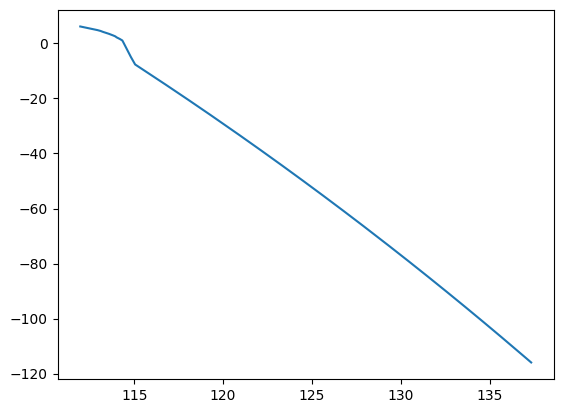

In [10]:
Wrange = np.interp(cc.rho_grid_bas,cc.rho_grid,cc_W[p.z_0-1,:])
plt.plot(Wrange, cc.grid[p.z_0-1].evaluateBatch(cc.rho_grid_bas[:,np.newaxis])[:,0])

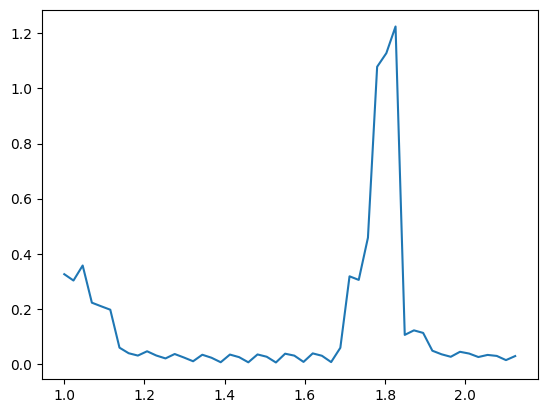

In [15]:
#Trying to plot the derivative and compare to rho
plt.plot(cc.rho_grid_bas[:50],tas_derivatives[:50]-cc.rho_grid_bas[:50])

In [38]:
jj = cc.grid[p.z_0-1].differentiate(cc.rho_grid_bas[0:3])

In [40]:
cc.grid[p.z_0-1].getNumDimensions()

1

In [39]:
jj

array(-2.52306488)

In [13]:
cc.grid[p.z_0-1].differentiate(cc.rho_grid_bas)

tas_derivatives = []
for pt in range(1,cc.rho_grid_bas.shape[0]-1):
    jac = cc.grid[p.z_0-1].differentiate(cc.rho_grid_bas[pt])  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = -jac/((Wrange[pt+1]-Wrange[pt-1])/(cc.rho_grid_bas[pt+1]-cc.rho_grid_bas[pt-1])) #Derivative around coordinate 1
    tas_derivatives.append(dJdx1)



In [39]:
cc.grid[p.z_0-1].differentiate(cc.rho_grid_bas[199])

array(-80.)

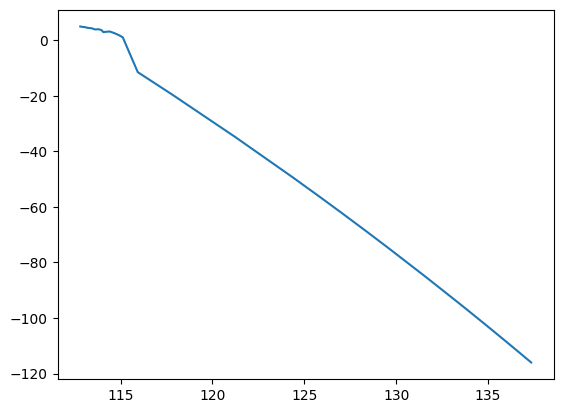

In [29]:
plt.plot(cc_W[p.z_0-1,:],cc_J[p.z_0-1,:])
#plt.plot(cc_W[p.z_0-1,:],cc_Jpi[p.z_0-1,:])

In [5]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)

115.11807503732125


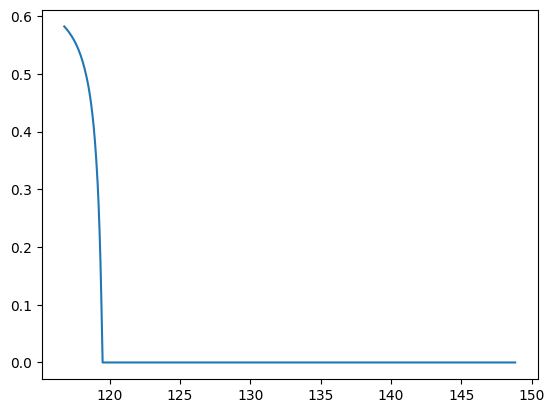

In [6]:
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

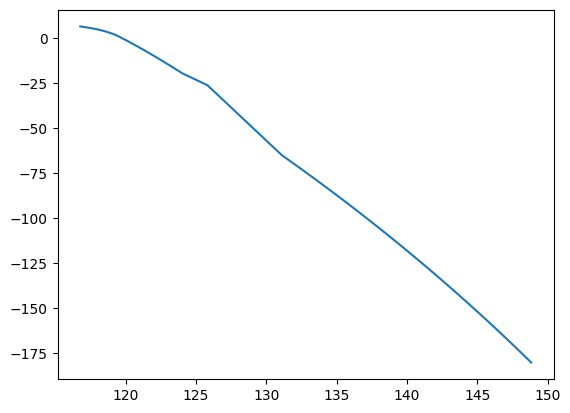

In [8]:
plt.plot(cc_W[p.z_0-1,:],cc_J[p.z_0-1,:])
#plt.plot(cc_W[p.z_0-1,:],cc_Jpi[p.z_0-1,:])

Tring to apply Tasmanian to the already evaluated J using interpolations.
Note: in the ideal Tasmanian scenario, I would instead directly evaluate J at the points suggested by Tasmanian! This would be essentially an endogenous grid method

In [5]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

(3, 200, 5, 4, 1, 1.0, 1.0, 1.0, 0.85, 0.25, 1.0)


In [8]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

In [71]:
from scipy.interpolate import RegularGridInterpolator

vals = np.array([RegularGridInterpolator((mwc_Rho.N_grid, mwc_Rho.N_grid1, mwc_Rho.rho_grid, mwc_Rho.Q_grid), J, bounds_error=False, fill_value=None) (po) for po in points])


In [57]:
dim = 1
outputs = 1
depth = 25
anisotropic_weights = [1, 1, 2]  # for example, give dimension 3 more weight. Use this to make the foc make sense in high dimensions!

grid = {}
grid[1] = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid[1].makeGlobalGrid(dim, outputs, depth, "level", "rleja")

points = grid[1].getPoints()

In [59]:
sorted_indices = np.argsort(points[:, 0])  # for a 1D example
points_sorted = points[sorted_indices]
values_sorted = original_values[sorted_indices]


In [63]:
sorted_indices[25]

0

In [64]:
inverse_indices[sorted_indices]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [60]:
# Create an inverse mapping from sorted indices back to original
inverse_indices = np.zeros_like(sorted_indices)
inverse_indices[sorted_indices] = np.arange(len(sorted_indices))

# Use inverse_indices to rearrange the updated values back to the original order
updated_values = updated_values_sorted[inverse_indices]


NameError: name 'updated_values_sorted' is not defined

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.interpolate import RegularGridInterpolator

J = objects['mwc_Rho_J']
W = objects['mwc_Rho_W']

J = J[p.z_0-1,...,0]

# Create a global sparse grid
dim = 3
outputs = 1
depth = 25
anisotropic_weights = [1, 1, 2]  # for example, give dimension 3 more weight. Use this to make the foc make sense in high dimensions!

grid = {}
grid[1] = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid[1].makeGlobalGrid(dim, outputs, depth, "level", "rleja", anisotropic_weights)
#Good methods: "clenshaw-curtis", rleja" maybe?, "gauss-patterson" kinda overdoes it, "leja" is good but requires higher depth (like 10)... still not many points though!


a = (mwc_Rho.N_grid[0]+1e-10,mwc_Rho.N_grid1[0]+1e-10,mwc_Rho.rho_grid[0]+1e-10)
b = (mwc_Rho.N_grid[-1]-1e-10,mwc_Rho.N_grid1[-1]-1e-10,mwc_Rho.rho_grid[-1]-1e-10)
grid[1].setDomainTransform(np.column_stack((a, b)))
# Get the points where Tasmanian wants J evaluated
points = grid[1].getPoints()  # shape = (N,4)
print ("Number of points", points.shape[0])

# Evaluate J at these points (our "given" data)
vals = np.array([RegularGridInterpolator((mwc_Rho.N_grid, mwc_Rho.N_grid1, mwc_Rho.rho_grid), J, bounds_error=False, fill_value=None) (po) for po in points])

# Load these values into the Tasmanian grid
grid[1].loadNeededPoints(vals)

# 1. Plotting along dimension 2:
# Fix other dimensions, say x0=0.0, x1=0.0, x3=0.5, x4=-0.2
j= 0
s= 1
fixed_x0 = mwc_Rho.N_grid[j]
fixed_x1 = mwc_Rho.N_grid1[s]


# Create a range of points along x_2
x2_values = mwc_Rho.rho_grid[1:-2]
plot_points = np.zeros((197,3))
plot_points[:,0] = fixed_x0
plot_points[:,1] = fixed_x1
plot_points[:,2] = x2_values


# Evaluate original function J at these slice points
original_values = np.array([J[j,s,1:-2]])[0,:]

# Evaluate the Tasmanian surrogate at these slice points
fitted_values = grid[1].evaluateBatch(plot_points)[:,0]

Number of points 1729


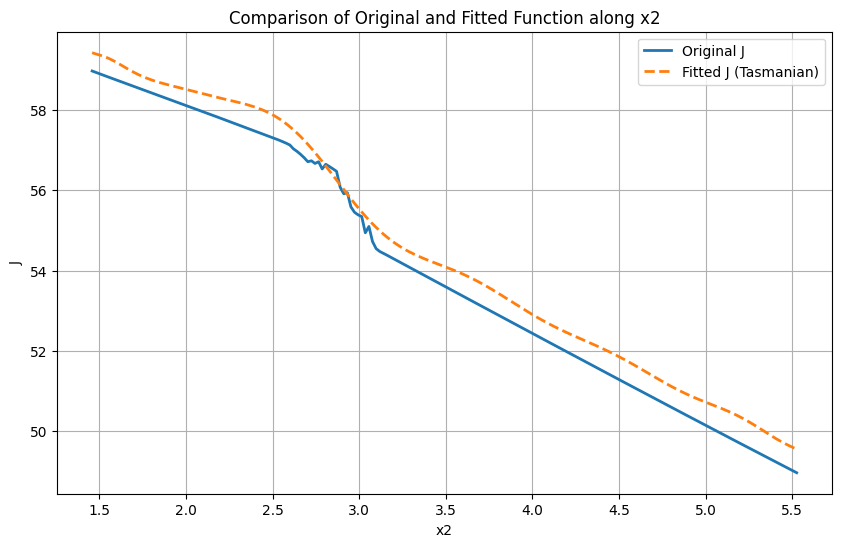

In [21]:
# Plot the original vs fitted
plt.figure(figsize=(10,6))
plt.plot(x2_values, original_values, label='Original J', linewidth=2)
plt.plot(x2_values, fitted_values, label='Fitted J (Tasmanian)', linestyle='--', linewidth=2)
plt.xlabel('x2')
plt.ylabel('J')
plt.title('Comparison of Original and Fitted Function along x2')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
j=0
s=0
v=100
deriv_points[:,0] = mwc_Rho.N_grid[j]
deriv_points[:,1] = mwc_Rho.N_grid1[s]  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = test_points   # fix other dimensions

tas_derivatives = []
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] #Derivative around coordinate 1
    tas_derivatives.append(dJdx1)

NameError: name 'deriv_points' is not defined

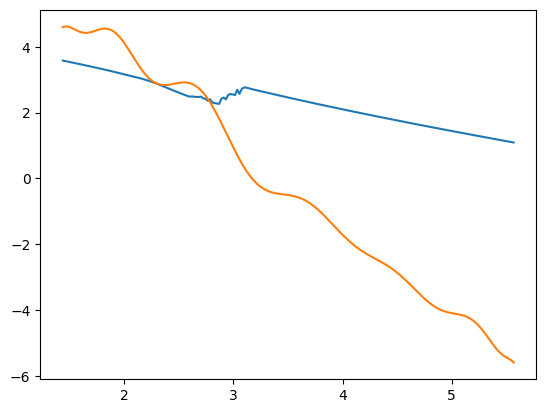

In [32]:
plt.plot(mwc_Rho.rho_grid,(J[j,3,:]-J[j,1,:])/2)
plt.plot(mwc_Rho.rho_grid,tas_derivatives)

In [207]:
test_points = (mwc_Rho.N_grid,mwc_Rho.N_grid1,mwc_Rho.rho_grid) # some test points for derivative


In [210]:
mwc_Rho.N_grid1.shape[0]

5

In [237]:
jac[1]

2.3687907119042744

In [233]:
(J[j,4,v]-J[j,2,v])/2

3.8372424078120986

In [218]:
mwc_Rho.N_grid1[1:-1]

array([1., 2., 3.])

In [30]:
#Getting derivatives around the original J values
# 2. Compute derivatives along dimension 1 (the second coordinate x_1):
# We can use Tasmanian's differentiate for a set of test points.
test_points = mwc_Rho.rho_grid# some test points for derivative

deriv_points = np.zeros((mwc_Rho.rho_grid.shape[0],3))
j=2
s=2
v=100
deriv_points[:,0] = mwc_Rho.N_grid[j]
deriv_points[:,1] = mwc_Rho.N_grid1[s]  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = test_points   # fix other dimensions

# Tasmanian derivative w.r.t. dimension 1:
# differentiate() returns the full Jacobian (for all outputs and all dims), 
# we need the correct index.
tas_derivatives = []
start_tas = time.perf_counter()
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] 
    tas_derivatives.append(dJdx1)
end_tas = time.perf_counter()
tas_time = end_tas - start_tas
tas_derivatives = np.array(tas_derivatives)

# 3. Finite difference approximation of the derivative w.r.t x_1:
def finite_diff_derivative(f, x, dim=1, h=1e-5):
    # f is J, x is point, dim is the dimension we differentiate along
    # We'll do a central difference: (f(x+h) - f(x-h)) / (2*h)
    x_forward = np.copy(x)
    x_backward = np.copy(x)
    x_forward[dim] += 1
    x_backward[dim] -= 1
    return (f[x_forward] - f[x_backward]) / (2)

# Compare the fitted derivative from Tasmanian with a finite difference approximation.
# We'll do finite difference using:
#   a) The original function J (for a reference "truth")
#   b) The fitted approximation (to see if FD on the surrogate matches its differentiate())

fd_fitted = []
start_fd_fitted = time.perf_counter()
for pt in deriv_points:
    # Using the fitted surrogate:
    fd_fitted.append(finite_diff_derivative(J[j,:,v], pt, dim=1,h=2e-1))
end_fd_fitted = time.perf_counter()
fd_fitted_time = end_fd_fitted - start_fd_fitted
fd_fitted = np.array(fd_fitted)

# Print comparison:
print("Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) ")
print("---------------------------------------------------------------------")
for x1_val, fd_orig_val, tas_val, fd_fit_val in zip(test_points, tas_derivatives, fd_fitted):
    print(f"{x1_val:+1.3f}\t{tas_val:+1.8f}\t{fd_fit_val:+1.8f}")

# Print timing info
print("\nTiming Information:")
print(f"Tasmanian differentiate: {tas_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference: {fd_fitted_time:.6f} seconds for {len(test_points)} points")

# The above results will show:
# - How Tasmanian's built-in derivative compares to a FD approximation of the original.
# - How FD on the fitted surrogate compares.
# - The relative speeds of Tasmanian differentiation vs finite differences.


IndexError: arrays used as indices must be of integer (or boolean) type

Basic example

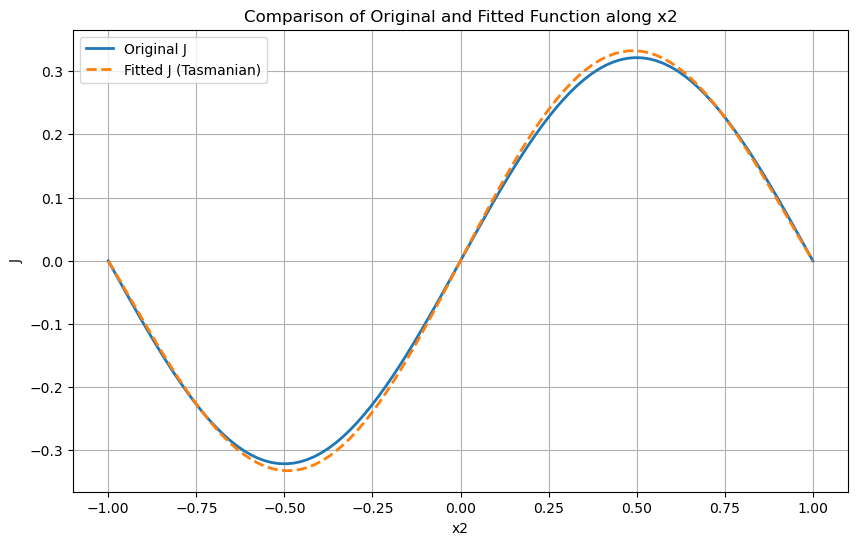

Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) 
---------------------------------------------------------------------
-0.800	+0.15936975	+0.20301242	+0.15574745
-0.720	+0.16197897	+0.22877791	+0.15778802
-0.640	+0.16053042	+0.24418361	+0.15592613
-0.560	+0.15461715	+0.24837205	+0.14979996
-0.480	+0.14402709	+0.24093288	+0.13923148
-0.400	+0.12877669	+0.22201060	+0.12425586
-0.320	+0.10912961	+0.19234678	+0.10513712
-0.240	+0.08559734	+0.15326637	+0.08236740
-0.160	+0.05892050	+0.10661701	+0.05664885
-0.080	+0.03003135	+0.05467114	+0.02885873
+0.000	+0.00000000	+0.00000000	+0.00000000
+0.080	-0.03003135	-0.05467114	-0.02885873
+0.160	-0.05892050	-0.10661701	-0.05664885
+0.240	-0.08559734	-0.15326637	-0.08236740
+0.320	-0.10912961	-0.19234678	-0.10513712
+0.400	-0.12877669	-0.22201060	-0.12425586
+0.480	-0.14402709	-0.24093288	-0.13923148
+0.560	-0.15461715	-0.24837205	-0.14979996
+0.640	-0.16053042	-0.24418361	-0.15592613
+0.720	-0.16197897	-0.22877791	-0.15778802

In [89]:
import numpy as np
import Tasmanian
import matplotlib.pyplot as plt
import time

# Define the 5D test function J
# J(x0,x1,x2,x3,x4) = exp(-x0^2 - x1^2)* sin(pi*x2)* cos(pi*x3) * (1 + x4^2)
def J(x):
    return (np.exp(-x[0]**2 - x[1]**2) 
            * np.sin(np.pi*x[2]) 
            * np.cos(np.pi*x[3]) 
            * (1.0 + x[4]**2))

# Let's pick which dimension to slice and which to differentiate:
# - We'll plot along x_2 (dimension=2), fixing x_0,x_1,x_3,x_4.
# - We'll differentiate along x_1 (dimension=1).

# Create a global sparse grid
dim = 5
outputs = 1
depth = 5
grid = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid.makeGlobalGrid(dim, outputs, depth, "level", "clenshaw-curtis")

# Get the points where Tasmanian wants J evaluated
points = grid.getPoints()  # shape = (N,5)

# Evaluate J at these points (our "given" data)
vals = np.array([[J(p)] for p in points])

# Load these values into the Tasmanian grid
grid.loadNeededPoints(vals)

# Now we have a fitted surrogate model using Tasmanian.

# 1. Plotting along dimension 2:
# Fix other dimensions, say x0=0.0, x1=0.0, x3=0.5, x4=-0.2
fixed_x0 = 0.0
fixed_x1 = 0.0
fixed_x3 = 0.4
fixed_x4 = -0.2

# Create a range of points along x_2
x2_values = np.linspace(-1, 1, 100)
plot_points = np.zeros((100,5))
plot_points[:,0] = fixed_x0
plot_points[:,1] = fixed_x1
plot_points[:,2] = x2_values
plot_points[:,3] = fixed_x3
plot_points[:,4] = fixed_x4

# Evaluate original function J at these slice points
original_values = np.array([J(pt) for pt in plot_points])

# Evaluate the Tasmanian surrogate at these slice points
fitted_values = grid.evaluateBatch(plot_points)[:,0]

# Plot the original vs fitted
plt.figure(figsize=(10,6))
plt.plot(x2_values, original_values, label='Original J', linewidth=2)
plt.plot(x2_values, fitted_values, label='Fitted J (Tasmanian)', linestyle='--', linewidth=2)
plt.xlabel('x2')
plt.ylabel('J')
plt.title('Comparison of Original and Fitted Function along x2')
plt.legend()
plt.grid(True)
plt.show()

# 2. Compute derivatives along dimension 1 (the second coordinate x_1):
# We can use Tasmanian's differentiate for a set of test points.
test_points = np.linspace(-0.8, 0.8, 21) # some test points for derivative
deriv_points = np.zeros((21,5))
deriv_points[:,0] = fixed_x0
deriv_points[:,1] = test_points  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = 0.2   # fix other dimensions
deriv_points[:,3] = fixed_x3
deriv_points[:,4] = fixed_x4

# Tasmanian derivative w.r.t. dimension 1:
# differentiate() returns the full Jacobian (for all outputs and all dims), 
# we need the correct index.
tas_derivatives = []
start_tas = time.perf_counter()
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] 
    tas_derivatives.append(dJdx1)
end_tas = time.perf_counter()
tas_time = end_tas - start_tas
tas_derivatives = np.array(tas_derivatives)

# 3. Finite difference approximation of the derivative w.r.t x_1:
def finite_diff_derivative(f, x, dim=1, h=1e-5):
    # f is J, x is point, dim is the dimension we differentiate along
    # We'll do a central difference: (f(x+h) - f(x-h)) / (2*h)
    x_forward = np.copy(x)
    x_backward = np.copy(x)
    x_forward[dim] += h
    x_backward[dim] -= h
    return (f(x_forward) - f(x_backward)) / (2.0*h)

# Compare the fitted derivative from Tasmanian with a finite difference approximation.
# We'll do finite difference using:
#   a) The original function J (for a reference "truth")
#   b) The fitted approximation (to see if FD on the surrogate matches its differentiate())

fd_original = []
start_fd_orig = time.perf_counter()
for pt in deriv_points:
    fd_original.append(finite_diff_derivative(J, pt, dim=1))
end_fd_orig = time.perf_counter()
fd_orig_time = end_fd_orig - start_fd_orig
fd_original = np.array(fd_original)

fd_fitted = []
start_fd_fitted = time.perf_counter()
for pt in deriv_points:
    # Using the fitted surrogate:
    fd_fitted.append(finite_diff_derivative(J, pt, dim=1,h=2e-1))
end_fd_fitted = time.perf_counter()
fd_fitted_time = end_fd_fitted - start_fd_fitted
fd_fitted = np.array(fd_fitted)

# Print comparison:
print("Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) ")
print("---------------------------------------------------------------------")
for x1_val, fd_orig_val, tas_val, fd_fit_val in zip(test_points, fd_original, tas_derivatives, fd_fitted):
    print(f"{x1_val:+1.3f}\t{fd_orig_val:+1.8f}\t{tas_val:+1.8f}\t{fd_fit_val:+1.8f}")

# Print timing info
print("\nTiming Information:")
print(f"Tasmanian differentiate: {tas_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference (original): {fd_orig_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference (fitted): {fd_fitted_time:.6f} seconds for {len(test_points)} points")

# The above results will show:
# - How Tasmanian's built-in derivative compares to a FD approximation of the original.
# - How FD on the fitted surrogate compares.
# - The relative speeds of Tasmanian differentiation vs finite differences.


Testing derivative speed: Tasmanian vs Finite Diff

In [77]:
import numpy as np
import Tasmanian

def f(x):
    # f(x) = sin(x)*exp(-x^2)
    return np.sin(x[0]) * np.exp(-x[0]**2)

def fprime(x):
    # f'(x) = cos(x)*exp(-x^2) - 2x*sin(x)*exp(-x^2)
    return (np.cos(x[0])*np.exp(-x[0]**2)) - (2*x[0]*np.sin(x[0])*np.exp(-x[0]**2))

# Create a global sparse grid
grid = Tasmanian.TasmanianSparseGrid()
grid.makeGlobalGrid(1, 1, 5, "level", "gauss-legendre")

# Get the points and load function values
interp_points = grid.getPoints()
vals = np.array([[f(pt)] for pt in interp_points])
grid.loadNeededPoints(vals)

# Points at which to differentiate
test_points = np.linspace(-1.0, 1.0, 11).reshape((11, 1))

approx_derivatives = []
for p in test_points:
    # Ensure p is passed as a simple list/array of floats
    x_list = p[0]  # Convert to a simple Python list with one element
    jac = grid.differentiate(x_list)
    # If jac is scalar, just append jac directly
    # If it's an array, you'd do jac[0], but likely it's scalar
    approx_derivatives.append(jac)

approx_derivatives = np.array(approx_derivatives)

exact_derivatives = np.array([fprime(p) for p in test_points])

print("x\t\tExact Derivative\tApprox Derivative\tError")
print("-------------------------------------------------------------")
for i, p in enumerate(test_points):
    approx = approx_derivatives[i]
    exact = exact_derivatives[i]
    error = abs(exact - approx)/abs(exact)
    print(f"{p[0]:+1.4f}\t{exact:+1.8f}\t{approx:+1.8f}\t{error:+1.8f}")


x		Exact Derivative	Approx Derivative	Error
-------------------------------------------------------------
-1.0000	-0.42035364	-0.22111074	+0.47398875
-0.8000	-0.23784212	-0.25215458	+0.06017632
-0.6000	+0.10309190	+0.08867878	+0.13980841
-0.4000	+0.51940407	+0.52765542	+0.01588620
-0.2000	+0.86528586	+0.86925111	+0.00458258
+0.0000	+1.00000000	+0.99615128	+0.00384872
+0.2000	+0.86528586	+0.86925111	+0.00458258
+0.4000	+0.51940407	+0.52765542	+0.01588620
+0.6000	+0.10309190	+0.08867878	+0.13980841
+0.8000	-0.23784212	-0.25215458	+0.06017632
+1.0000	-0.42035364	-0.22111074	+0.47398875


## Older stuff: Spline fitting

In [ ]:
from scipy.interpolate import UnivariateSpline

# Spline Fitting
def fit_spline(W, J1, smoothness=0):
    """
    Fit a Univariate Spline to the data.

    Parameters:
    - W: Input grid points.
    - J1: Observed values at grid points.
    - smoothness: Smoothing factor. Larger values result in smoother fits.
      Default of 0 results in an interpolating spline.

    Returns:
    - spline: Fitted spline object.
    """
    spline = UnivariateSpline(W, J1, s=smoothness)
    return spline

# Fit the spline (adjust smoothness if needed)
smoothness_factor = 0.1  # Adjust this based on your needs
spline = fit_spline(mwc_Rho_W[2,2,2,:,0,1], mwc_Rho_J[2,2,2,:,0], smoothness=smoothness_factor)

In [ ]:
# Evaluate the spline over a fine grid
W_fine = np.linspace(mwc_Rho_W[2,2,2,:,0,1].min(), mwc_Rho_W[2,2,2,:,0,1].max(), 500)
J1_spline = spline(W_fine)

# Plot the Results
plt.figure(figsize=(8, 5))
plt.scatter(mwc_Rho_W[2,2,2,:,0,1], mwc_Rho_J[2,2,2,:,0], label="Observed Data", color="blue", alpha=0.7)
#plt.plot(W_fine, true_function, label="True Function (Ground Truth)", color="green", linestyle="--")
plt.plot(W_fine, J1_spline, label="Spline Approximation", color="red")
plt.xlabel("W")
plt.ylabel("J1")
plt.title("Spline Fitting to Capture Concavity")
plt.legend()
plt.show()

# Access Spline Derivatives
first_derivative = spline.derivative(n=1)(W_fine)  # First derivative
delta_second_derivative = spline.derivative(n=2)(W_fine)  # Second derivative